# Analyse et Visualisation des Résultats de Clustering - Projet GEMINI

Ce notebook a pour objectif de **traiter, d'analyser et de visualiser les résultats de classification spectrale** obtenus par l'algorithme GEMINI (MLP-MMD) sur les spectres de galaxies.  
Les résultats analysés ici ont été **générés à l'aide de scripts d'exécution et de tests** exécutés sur des machines de calcul à distance, et sont disponibles sur [mon GitHub](https://github.com/RacimZz/Gemclus_DeepLearning).

---

## Contexte

Dans le cadre du projet, plusieurs expériences de classification non supervisée ont été menées afin d'explorer différentes configurations d'hyperparamètres (nombre de clusters, kernel, learning rate, etc.).  
Les données brutes ainsi que les résultats intermédiaires (labels de clusters, métriques d'évaluation) sont systématiquement sauvegardés pour permettre une analyse détaillée.

---

## Objectifs de ce notebook

- Charger et agréger les résultats de clustering (labels, scores, etc.).
- Traiter le contenus des JSON(l) génerés sur le serveur.
- Calculer des métriques d'évaluation de la qualité de classification (Silhouette, Calinski-Harabasz, Davies-Bouldin…).
- Visualiser les partitions obtenues (courbes, diagrammes de Sankey, visualisation 3D).
- Comparer différentes configurations de modèles et d'hyperparamètres.
- Générer des graphiques pour les rapports ou présentations.

---

## Note technique

Les résultats chargés ici ont été générés en amont par des scripts Python/R (voir le dépôt GitHub), lancés sur des clusters de calcul distants. Ce notebook **n'entraîne pas de modèles**, il se concentre uniquement sur l'analyse et la valorisation des résultats.

---


### Import des bibliothèques
Importation des librairies nécessaires pour l'analyse, le calcul et la visualisation des données spectrales et des résultats de clustering.

In [2]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objects as go
import plotly.io as pio

from sklearn.preprocessing import StandardScaler
from gemclus import mlp
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score


### Calculs du silhouette score de la classification de [Chambon et Al.]
On calcule le silhouette score de la classification avec FisherEM pour pouvoir comparer avec nos résultats en Deep Learning.

In [ ]:

# Charger les données 
X = pd.read_csv("../DATA/flux_pretreated_NGC1068_6400_6800_high_velocity_normalise_redshift_filter_subset-002.csv", header=None).to_numpy()  
# Charger les labels ()
labels_df = pd.read_csv("../DATA/classification_results_K16_DkBk_NGC1068_6400_6800_high_velocity_normalise_subset_redshift_filter_it25_25.csv", header=None).to_numpy()  
labels = labels_df[:, 1]  # deuxième colonne (index 1) contient les labels

# Vérification du nombre de clusters
if len(set(labels)) < 2:
    print("❌ Impossible de calculer le score : un seul cluster détecté.")
else:
    score = silhouette_score(X, labels)
    print(f"✅ Silhouette Score : {score:.4f}")


### Chargement d'une autre version des données spectrales
Test de chargement d'une version normalisée, pour comparer différents traitements.

In [17]:
X = pd.read_csv("../DATA/flux_pretreated_NGC1068_6400_6800_high_velocity_normalise_redshift_filter_subset-002.csv",delimiter=",").to_numpy()  
print(f"{X.shape[0]} spectres et {X.shape[1]} points de données par spectre")

68232 spectres et 3592 points de données par spectre


### Chargement des labels de classification
On charge les résultats de classification générés précédemment (labels de clusters trouvés).

In [38]:
labels_df = pd.read_csv("../labels_sample68232_clusters30_kernellinear_lr0.001_hid20_standardise_.csv", header=None)  # reste en DataFrame
print(f"{labels_df.shape[0]} spectres et {labels_df.shape[1]} colonnes dans le DataFrame des labels")

68232 spectres et 2 colonnes dans le DataFrame des labels


### Chargement des données brutes
Pour comparaison ou analyses complémentaires, on charge les données spectrales brutes (avant tout prétraitement).

In [42]:

# Chargement des données brutes
X_raw = pd.read_csv("../DATA/flux_pretreated_NGC1068_6400_6800_high_velocity_normalise_redshift_filter_subset-002.csv", delimiter=",").to_numpy()
print("✅ Données brutes chargées :", X_raw.shape)

# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)
print("✅ Données normalisées :", X_scaled.shape)

# Chargement du fichier de labels (avec indices)
labels_df = pd.read_csv("../labels_sample68232_clusters30_kernellinear_lr0.001_hid20_standardise_.csv")
print(f"✅ {labels_df.shape[0]} lignes de labels chargées")

# Récupérer les indices et les labels
indices = labels_df["index"].to_numpy()
labels = labels_df["cluster"].to_numpy()

# Restreindre X aux bons indices
X_sub = X_scaled[indices]

# Vérification du nombre de clusters
if len(set(labels)) < 2:
    print("❌ Impossible de calculer le score : un seul cluster détecté.")
else:
    score = silhouette_score(X_sub, labels)
    print(f"✅ Silhouette Score : {score:.4f}")

✅ Données brutes chargées : (68232, 3592)
✅ Données normalisées : (68232, 3592)
✅ 68232 lignes de labels chargées
✅ Silhouette Score : -0.0630


### Calcul des scores de clustering
On calcule deux scores d'évaluation de la qualité du clustering : Calinski-Harabasz et Davies-Bouldin.

In [22]:
ch_score = calinski_harabasz_score(X, labels) if len(set(labels)) > 1 else np.nan
db_score = davies_bouldin_score(X, labels) if len(set(labels)) > 1 else np.nan


### Affichage des scores de clustering
On affiche les valeurs des scores précédemment calculés.

In [23]:
print("calinski_harabasz_score:", ch_score)
print("davies_bouldin_score:", db_score)

calinski_harabasz_score: 569.3176222537004
davies_bouldin_score: 65.27250244732797


### Import d'une fonction personnalisée (ou utilitaire) pour le clustering
On importe ou adapte une fonction spécifique pour l'analyse ou le post-traitement des clusters.

Pour n_clusters = 21 le score silhouette moyen est : -0.06301214804573006


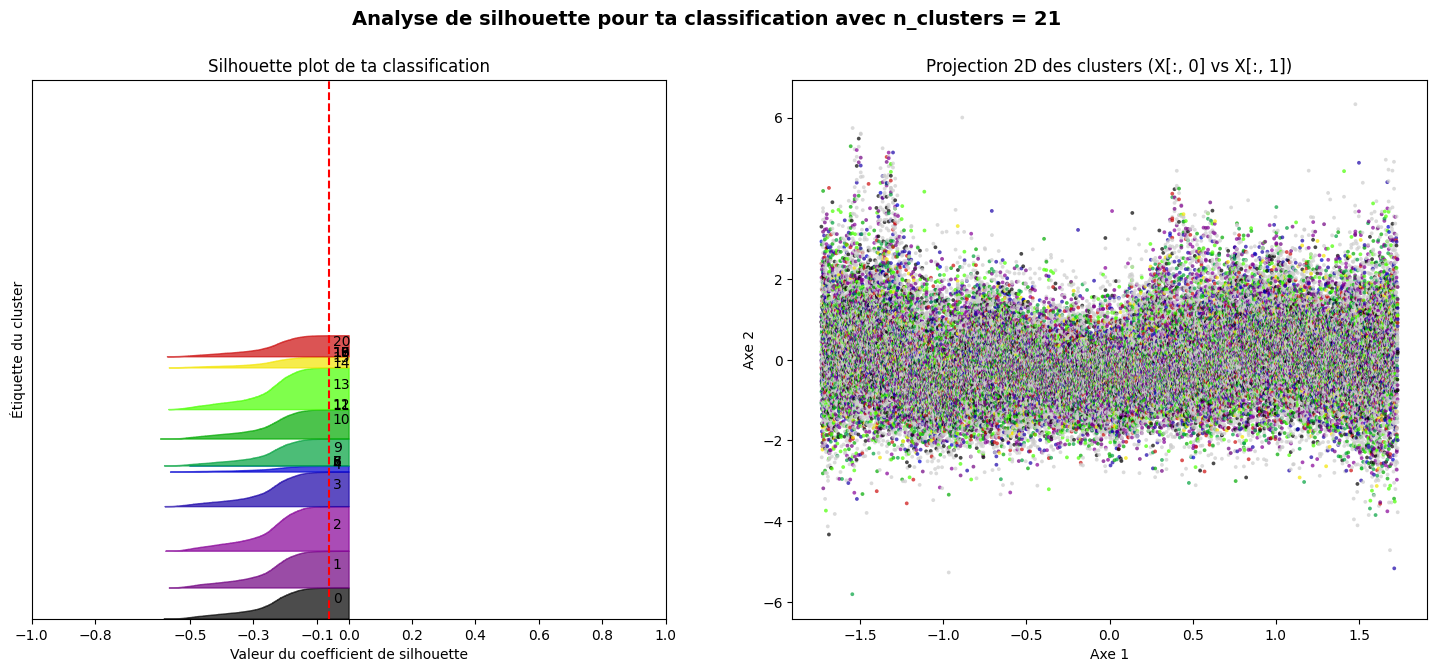

In [43]:
# SPDX-License-Identifier: BSD-3-Clause
# Auteurs : scikit-learn devs + adapté pour ton cas

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score



# Déterminer le nombre de clusters uniques
range_n_clusters = [len(np.unique(labels))]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Pas de fit_predict ici, on utilise directement les labels
    cluster_labels = labels

    # Silhouette moyenne globale
    silhouette_avg = score
    print(
        "Pour n_clusters =",
        n_clusters,
        "le score silhouette moyen est :",
        silhouette_avg,
    )

    # Score pour chaque point
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # espacement entre clusters

    ax1.set_title("Silhouette plot de ta classification")
    ax1.set_xlabel("Valeur du coefficient de silhouette")
    ax1.set_ylabel("Étiquette du cluster")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-1,-0.8,-0.5,-0.3,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot: projection des clusters en 2D (juste pour visuel)
    # ATTENTION : ici on suppose que X est au moins 2D
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    ax2.set_title("Projection 2D des clusters (X[:, 0] vs X[:, 1])")
    ax2.set_xlabel("Axe 1")
    ax2.set_ylabel("Axe 2")

    plt.suptitle(
        "Analyse de silhouette pour ta classification avec n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


### (Double) Chargement et normalisation des données (optionnel)
Chargement répété pour vérification ou autres tests sur les données spectrales.

In [29]:
# Chargement et normalisation des données
X_raw = pd.read_csv("../DATA/flux_pretreated_NGC1068_6400_6800_high_velocity_normalise_redshift_filter_subset-002.csv", delimiter=",").to_numpy()
print("✅ Données brutes chargées :", X_raw.shape)

# Normalisation des données
scaler = StandardScaler()
X = scaler.fit_transform(X_raw)
print("✅ Données normalisées :", X.shape)

labels_df = pd.read_csv("../DATA/classification_results_K16_DkBk_NGC1068_6400_6800_high_velocity_normalise_subset_redshift_filter_it25_25.csv", header=None)  # reste en DataFrame
print(f"{labels_df.shape[0]} spectres et {labels_df.shape[1]} colonnes dans le DataFrame des labels")

labels = labels_df[1].to_numpy()  # colonne 1 = labels
# Vérification du nombre de clusters
if len(set(labels)) < 2:
    print("❌ Impossible de calculer le score : un seul cluster détecté.")
else:
    score = silhouette_score(X, labels)
    print(f"✅ Silhouette Score : {score:.4f}")


✅ Données brutes chargées : (68232, 3592)
✅ Données normalisées : (68232, 3592)
68232 spectres et 2 colonnes dans le DataFrame des labels
✅ Silhouette Score : -0.0816


### Définition des hyperparamètres de tests
On prépare différentes valeurs de kernels, nombres de clusters et learning rates à tester sur Gemini.

In [ ]:
# Définir les paramètres de test
kernels = ["linear", "poly"]
n_clusters_list = [20,30,40]
LR = [1e-2, 1e-3, 1e-4]
results = []

### Choix manuel d'une combinaison d'hyperparamètres à tester
Ici, kernel = 'poly', nombre de clusters = 30, lr = 0.001.

In [29]:
kernel = "poly"
n_clusters = 30
lr = 0.001
print("************************************************************************")
print(f"⏳ Test : n_clusters={n_clusters}, kernel={kernel}, learning_rate={lr}")
start = time.time()
model = mlp.MLPMMD(n_clusters=n_clusters, kernel=kernel, random_state=0, ovo=True, max_iter=15)
y_pred = model.fit_predict(X)
duration = time.time() - start

try:
    n_labels = len(set(y_pred))
    sil_score = silhouette_score(X, y_pred) if n_labels > 1 else np.nan
    ch_score = calinski_harabasz_score(X, y_pred) if n_labels > 1 else np.nan
    db_score = davies_bouldin_score(X, y_pred) if n_labels > 1 else np.nan
except Exception:
    sil_score = ch_score = db_score = np.nan

results.append({
    "kernel": kernel,
    "n_clusters": n_clusters,
    "n_labels": n_labels,
    "time": duration,
    "silhouette": sil_score,
    "calinski_harabasz": ch_score,
    "davies_bouldin": db_score,
    "learning_rate": 0.001,
    "score": model.score(X),
    "ovo": True,
    "n_iter": model.n_iter_
})

print(f"✅ Fini :")
print(f"time = {duration:.2f}s, nombre de labels = {n_labels}, silhouette = {sil_score}")
print(f"Calinski-Harabasz: {ch_score}, Davies-Bouldin: {db_score}")
print(f"Score du modele : {model.score(X)} en {model.n_iter_} itérations")
print("************************************************************************")

print()

************************************************************************
⏳ Test : n_clusters=30, kernel=poly, learning_rate=0.001


AttributeError: 'MLPMMD' object has no attribute '_validate_data'

### Import de librairies pour la visualisation Sankey et encodage
On prépare les outils pour créer des graphes Sankey comparant différentes classifications.

In [17]:
import pandas as pd
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import plotly.io as pio

def plot_sankey(labels_old, labels_new, title="Sankey: ancienne vs nouvelle classification"):
    # Affichage dans le navigateur
    pio.renderers.default = "browser"

    assert len(labels_old) == len(labels_new), "Les deux vecteurs doivent avoir la même taille"

    # Encoder pour avoir des entiers consécutifs
    le_old = LabelEncoder().fit(labels_old)
    le_new = LabelEncoder().fit(labels_new)
    old_encoded = le_old.transform(labels_old)
    new_encoded = le_new.transform(labels_new)

    # Créer un DataFrame croisé
    df = pd.DataFrame({"old": old_encoded, "new": new_encoded})
    flow = df.groupby(["old", "new"]).size().reset_index(name='count')

    # Créer les labels pour le sankey
    old_labels = [f"Old {cls}" for cls in le_old.classes_]
    new_labels = [f"New {cls}" for cls in le_new.classes_]
    labels = old_labels + new_labels

    # Mapper les index
    flow['source'] = flow['old']
    flow['target'] = flow['new'] + len(le_old.classes_)

    # Sankey diagram avec gros pad et grande hauteur
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=120,             # Très grand espace entre les classes
            thickness=20,
            line=dict(color="black", width=0.5),
            label=labels
        ),
        link=dict(
            source=flow['source'],
            target=flow['target'],
            value=flow['count']
        )
    )])

    fig.update_layout(
        title_text=title,
        font_size=12,
        height=4000           # Hauteur augmentée pour scroller
    )
    # fig.show()   # <-- tu peux commenter si tu ne veux plus afficher dans le browser
    return fig

# Chargement des classifications
classification_old = pd.read_csv(
    "../nameclass_standardise.csv",
    header=None
).to_numpy()
print("Classification ancienne chargée :", classification_old.shape)

class_old = []
for i in classification_old:
    if len(i) > 1:
        class_old.append(i[1])
    else:
        class_old.append(i[0])

classification_new = pd.read_csv(
    "../spectra4567fclsK87.csv", header=None
).to_numpy()
print("Classification nouvelle chargée :", classification_new.shape)

class_new = []
for i in classification_new:
    if len(i) > 1:
        class_new.append(i[1])
    else:
        class_new.append(i[0])

fig = plot_sankey(class_old, class_new, title="Sankey Diagram")



Classification ancienne chargée : (302248, 2)
Classification nouvelle chargée : (302248, 2)


### Chargement d'un fichier RData (spectres)
Utilisation de pyreadr pour lire des fichiers de données R, par exemple des spectres sauvegardés via R.

In [2]:
import pyreadr
import pandas as pd
import os

# Chemin vers ton .RData
rdata_path = '../spectra4567fclsK87.RData'  # À adapter !
output_dir = '../'  # Dossier où tu veux stocker les CSV

# Crée le dossier de sortie si besoin
os.makedirs(output_dir, exist_ok=True)

# Charge le .RData
result = pyreadr.read_r(rdata_path)

# Pour chaque objet extrait, on essaie de l'exporter en CSV
for key in result.keys():
    print(f"Traitement de {key}...")
    obj = result[key]
    # Si c'est un DataFrame
    if isinstance(obj, pd.DataFrame):
        obj.to_csv(f"{output_dir}/{key}.csv", index=False)
    # Si c'est un vecteur/array
    elif isinstance(obj, (pd.Series, list)):
        pd.DataFrame(obj).to_csv(f"{output_dir}/{key}.csv", index=False, header=False)
    # Pour les autres objets simples (exemple : un int, float...)
    else:
        try:
            pd.DataFrame([obj]).to_csv(f"{output_dir}/{key}.csv", index=False, header=False)
        except Exception as e:
            print(f"Non exporté : {key} ({type(obj)}) — {e}")

print("Conversion terminée ! Les fichiers sont dans", output_dir)


Traitement de spectra4567fclsK87...
Conversion terminée ! Les fichiers sont dans ../


### Export d'une figure Plotly en image PNG
Sauvegarde d'une visualisation Plotly (ex: Sankey) en fichier image.

In [19]:
# Après fig.update_layout(...)
fig.write_image("../newplot.png.png", width=1600, height=4000, scale=2, engine="kaleido")  # Image très grande

# --- Générer un PDF avec cette image (optionnel) ---
from reportlab.platypus import SimpleDocTemplate, Image as RLImage
from reportlab.lib.pagesizes import A0  # Peut aussi essayer A1, etc. selon la taille

pdf_path = "sankey_diagram.pdf"
doc = SimpleDocTemplate(pdf_path, pagesize=A0)
story = [RLImage("sankey.png", width=1500, height=3800)]  # Ajuste width/height si besoin
doc.build(story)

print("PDF exporté !")


ValueError: 
Image export using the "kaleido" engine requires the Kaleido package,
which can be installed using pip:

    $ pip install --upgrade kaleido


### Lecture d'un fichier CSV de résultats de clustering
On charge une classification précédente pour analyse ou comparaison.

In [8]:
import pandas as pd

df = pd.read_csv("../spectra4567fclsK87.csv", header=None)

# Ajouter l'indice à gauche (de 1 à N)
df.insert(0, None, range(1, len(df) + 1))

# Sauvegarder SANS entête de colonne
df.to_csv("../spectra4567fclsK87_avec_index.csv", index=False, header=False)


[[1, 29], [2, 11], [3, 29], [4, 29], [5, 29], [6, 11], [7, 4], [8, 29], [9, 29], [10, 29], [11, 4], [12, 2], [13, 29], [14, 29], [15, 4], [16, 4], [17, 4], [18, 29], [19, 2], [20, 4], [21, 4], [22, 4], [23, 11], [24, 11], [25, 11], [26, 11], [27, 11], [28, 11], [29, 29], [30, 29], [31, 29], [32, 4], [33, 4], [34, 4], [35, 4], [36, 4], [37, 4], [38, 4], [39, 29], [40, 4], [41, 4], [42, 4], [43, 4], [44, 2], [45, 16], [46, 14], [47, 14], [48, 4], [49, 4], [50, 4], [51, 4], [52, 29], [53, 4], [54, 29], [55, 4], [56, 4], [57, 14], [58, 14], [59, 16], [60, 19], [61, 16], [62, 16], [63, 16], [64, 14], [65, 4], [66, 14], [67, 29], [68, 29], [69, 14], [70, 2], [71, 4], [72, 29], [73, 4], [74, 4], [75, 4], [76, 29], [77, 14], [78, 14], [79, 2], [80, 14], [81, 19], [82, 19], [83, 19], [84, 16], [85, 16], [86, 16], [87, 16], [88, 4], [89, 4], [90, 29], [91, 2], [92, 2], [93, 4], [94, 4], [95, 4], [96, 4], [97, 2], [98, 2], [99, 16], [100, 16], [101, 14], [102, 16], [103, 19], [104, 19], [105, 19]

### Affichage d'un cluster spécifique
On affiche les données du cluster 2 pour inspection.

In [ ]:
print(X[y_pred == 2])

[[0.00000000e+00 1.73700863e+00 1.73277193e+00 ... 7.47202936e-01
  7.51602137e-01 8.48909240e-01]
 [1.00000000e+00 1.82481856e+00 1.66954481e+00 ... 5.60039349e-01
  6.77338598e-01 6.92598634e-01]
 [2.00000000e+00 1.90722967e+00 1.70622747e+00 ... 9.92153681e-01
  1.17577505e+00 1.17497965e+00]
 ...
 [1.07600000e+03 1.18947392e+00 1.09675384e+00 ... 7.78955036e-01
  8.03900951e-01 1.10819052e+00]
 [1.07700000e+03 1.14932223e+00 1.25502044e+00 ... 1.10279239e+00
  1.23382763e+00 1.63984995e+00]
 [1.07800000e+03 7.96187744e-01 1.07689221e+00 ... 1.26838057e+00
  9.74825935e-01 1.52484872e+00]]


### Agrégation de résultats sur plusieurs fichiers
On parcourt un dossier pour analyser ou agréger plusieurs sorties de clustering.

In [2]:
import os
import json
import glob
import pandas as pd

# 📁 Dossier contenant les résultats
folder_path = "./../results/json/st"  
folder_path_complet = "./../results/json/st/"
# 🔍 Trouve tous les fichiers .json et .jsonl
json_files = glob.glob(os.path.join(folder_path, "*.json"))
jsonl_files = glob.glob(os.path.join(folder_path, "*.jsonl"))
jsonl_files += glob.glob(os.path.join(folder_path_complet, "*.jsonl"))
# 📦 Liste de tous les résultats
results = []

# 📥 Lecture des fichiers .jsonl (une ligne = un dict)
for file_path in jsonl_files:
    print(f"📂 Chargement JSONL : {file_path}")
    with open(file_path, "r") as f:
        for line in f:
            try:
                results.append(json.loads(line))
            except json.JSONDecodeError as e:
                print(f"⚠️ Erreur JSONL dans {file_path} : {e}")

# 📥 Lecture des fichiers .json (fichier entier = list ou dict)
for file_path in json_files:
    print(f"📂 Chargement JSON : {file_path}")
    with open(file_path, "r") as f:
        try:
            data = json.load(f)
            # Si c’est une liste de dicts, on étend
            if isinstance(data, list):
                results.extend(data)
            else:
                results.append(data)
        except json.JSONDecodeError as e:
            print(f"⚠️ Erreur JSON dans {file_path} : {e}")

# ✅ Conversion en DataFrame
df = pd.DataFrame(results)
print(f"\n✅ {len(results)} résultats chargés depuis {len(json_files) } fichiers.")

# Aperçu des colonnes
print("📊 Colonnes disponibles :", df.columns.tolist())


📂 Chargement JSONL : ./../results/json/st\ovo_hid.jsonl
📂 Chargement JSONL : ./../results/json/st\rapport.jsonl
📂 Chargement JSONL : ./../results/json/st\ovo_hid.jsonl
📂 Chargement JSONL : ./../results/json/st\rapport.jsonl
📂 Chargement JSON : ./../results/json/st\diff_kernel_re_standardise.json
📂 Chargement JSON : ./../results/json/st\finale_re_standardise.json

✅ 257 résultats chargés depuis 2 fichiers.
📊 Colonnes disponibles : ['kernel', 'n_clusters', 'learning_rate', 'n_labels', 'time', 'silhouette', 'calinski_harabasz', 'davies_bouldin', 'score', 'n_iter', 'ovo', 'hidden_dim']


### Visualisation 3D des clusters
Utilisation de la PCA ou t-SNE pour projeter et visualiser les clusters en 3D.

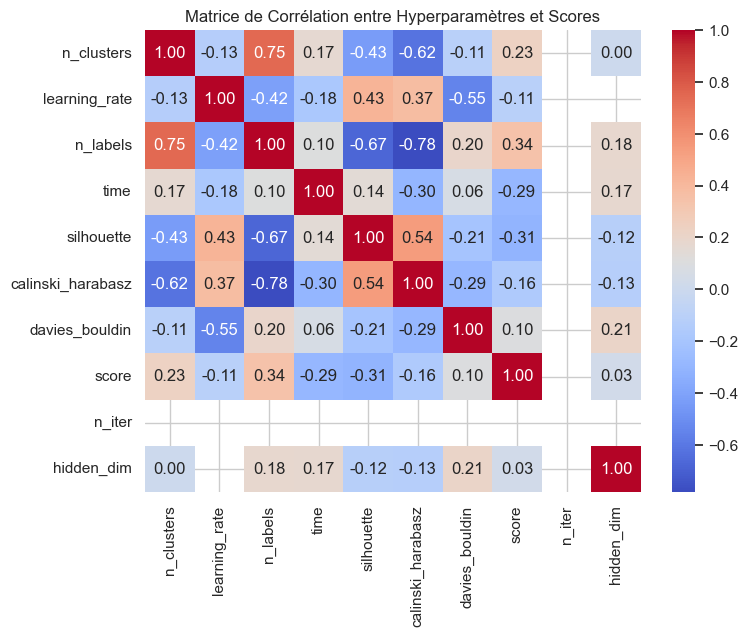

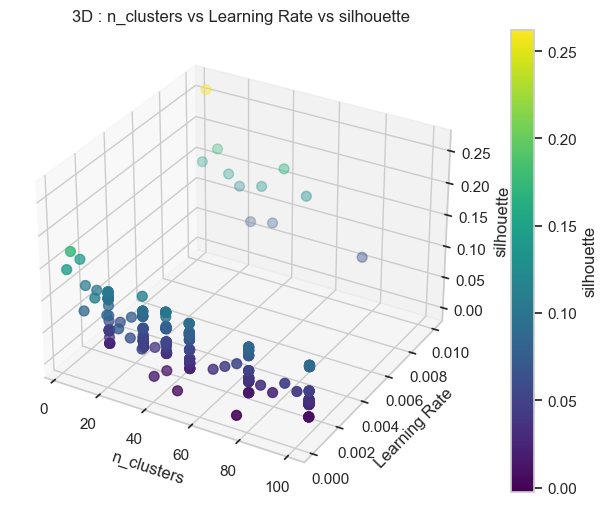

C:\Users\racim\AppData\Local\Temp\ipykernel_21684\347191385.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x="n_clusters", y=metric, data=df[df["kernel"] != "sigmoid"],


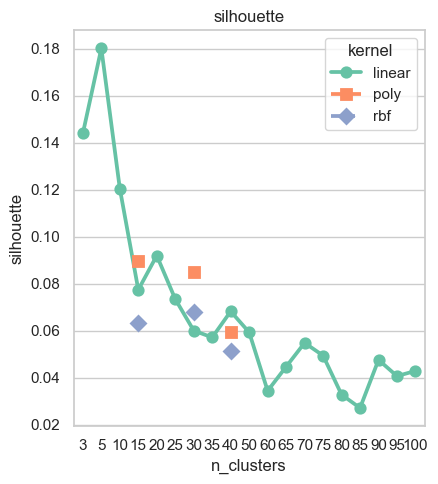

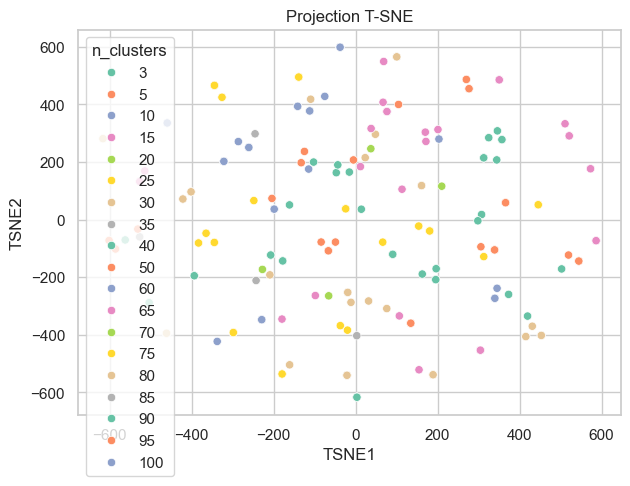

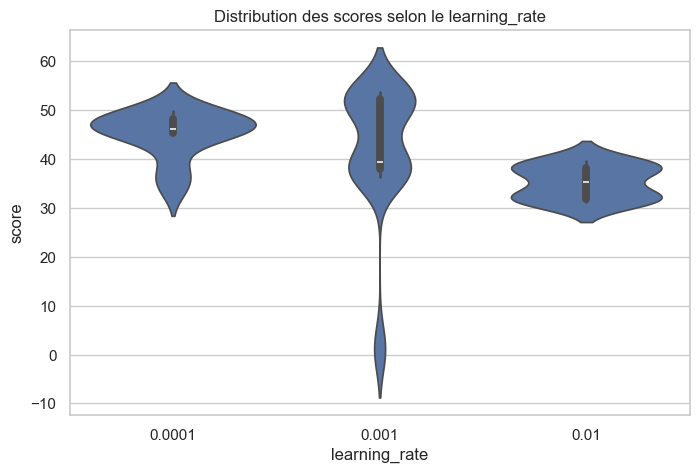

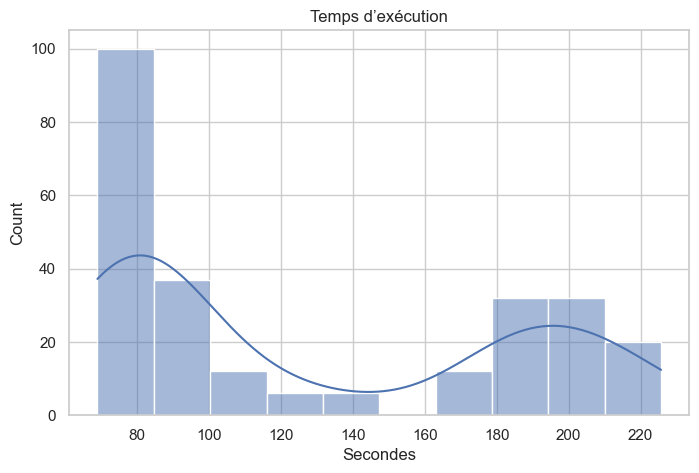

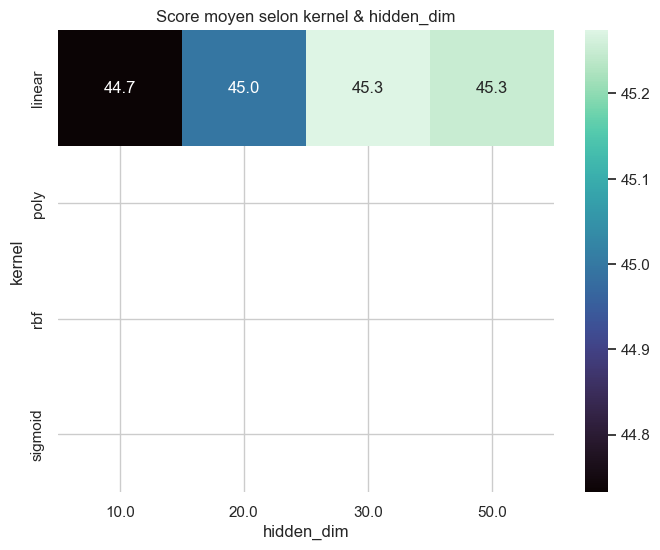

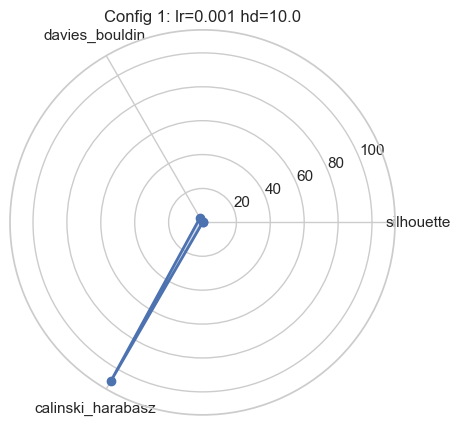

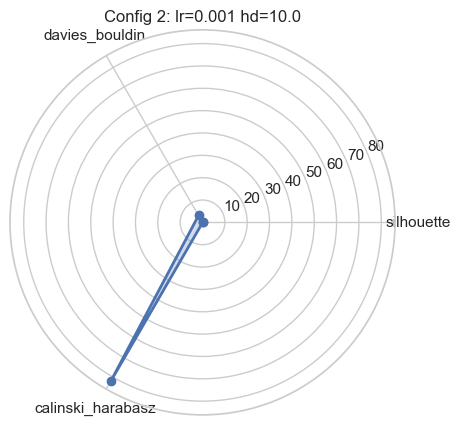

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# --- Sélection des seules colonnes numériques pour la corrélation ---
num_df = df.select_dtypes(include=[np.number])

# 1️⃣ Matrice de corrélation (uniquement numérique)
plt.figure(figsize=(8, 6))
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de Corrélation entre Hyperparamètres et Scores")
plt.show()

# 2️⃣ Graphique 3D des interactions
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df["n_clusters"], df["learning_rate"], df["silhouette"],
                c=df["silhouette"], cmap="viridis", s=50)
ax.set_xlabel("n_clusters")
ax.set_ylabel("Learning Rate")
ax.set_zlabel("silhouette")
plt.colorbar(sc, label="silhouette")
plt.title("3D : n_clusters vs Learning Rate vs silhouette")
plt.show()



plt.figure(figsize=(12, 5))
for i, metric in enumerate(["silhouette"], 1):
    plt.subplot(1, 3, i)
    sns.pointplot(x="n_clusters", y=metric, data=df[df["kernel"] != "sigmoid"],
                 markers=["o", "s", "D"], linestyles=["-", "--", "-."],
                 palette="Set2", ci=None, hue="kernel")
    plt.title(metric)
plt.tight_layout()
plt.show()



# 6️⃣ T-SNE non-linéaire
# Utiliser uniquement les colonnes numériques pour T-SNE
tsne = TSNE(n_components=2, perplexity=5, learning_rate=100, random_state=42)
# On prend les colonnes numériques pertinentes
tsne_cols = ["learning_rate", "silhouette"]
coords2 = tsne.fit_transform(num_df[tsne_cols].values)
df_tsne = pd.DataFrame(coords2, columns=["TSNE1", "TSNE2"])
plt.figure(figsize=(7, 5))
sns.scatterplot(x="TSNE1", y="TSNE2", hue=df["n_clusters"], palette="Set2", data=df_tsne)
plt.title("Projection T-SNE")
plt.show()

# 7️⃣ Violinplot du score par learning_rate
plt.figure(figsize=(8, 5))
sns.violinplot(x="learning_rate", y="score", data=df)
plt.title("Distribution des scores selon le learning_rate")
plt.show()

# 8️⃣ Histogramme des temps d’exécution
plt.figure(figsize=(8, 5))
sns.histplot(df["time"], bins=10, kde=True)
plt.title("Temps d’exécution")
plt.xlabel("Secondes")
plt.show()

# 9️⃣ Heatmap Score vs (hidden_dim, n_clusters)
pivot = df.pivot_table(index="kernel",
                       columns="hidden_dim",
                       values="score",
                       aggfunc="mean")

# Fill missing values with np.nan (or 0 if you prefer)
pivot = pivot.reindex(index=['linear', 'poly', 'rbf', 'sigmoid'])  # Ensure all kernels are present
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="mako")
plt.title("Score moyen selon kernel & hidden_dim")
plt.show()

# 🔟 Radar chart de quelques configurations clés
import math
def radar_plot(row, metrics, title):
    angles = np.linspace(0, 2*math.pi, len(metrics), endpoint=False).tolist()
    values = row[metrics].tolist()
    values += values[:1]  # boucle la forme
    angles += angles[:1]
    fig, ax = plt.subplots(subplot_kw=dict(polar=True), figsize=(5,5))
    ax.plot(angles, values, 'o-', linewidth=2)
    ax.fill(angles, values, alpha=0.25)
    ax.set_thetagrids(np.degrees(angles[:-1]), metrics)
    ax.set_title(title)
    plt.show()

metrics = ["silhouette","davies_bouldin","calinski_harabasz"]
# Exemple sur les deux premières configs
radar_plot(df.iloc[0], metrics, f"Config 1: lr={df.iloc[0]['learning_rate']} hd={df.iloc[0]['hidden_dim']}")
radar_plot(df.iloc[1], metrics, f"Config 2: lr={df.iloc[1]['learning_rate']} hd={df.iloc[1]['hidden_dim']}")

### Fonction pour tracer un diagramme de Sankey
Permet de visualiser le flux d'étiquettes entre deux classifications différentes.

In [ ]:
def plot_sankey(labels_old, labels_new, title="Sankey: ancienne vs nouvelle classification"):
    # Vérifier la taille
    assert len(labels_old) == len(labels_new), "Les deux vecteurs doivent avoir la même taille"

    # Encoder pour avoir des entiers consécutifs
    le_old = LabelEncoder().fit(labels_old)  # [1,2,...,1079] 
    le_new = LabelEncoder().fit(labels_new)
    old_encoded = le_old.transform(labels_old)
    new_encoded = le_new.transform(labels_new)

    # Créer un DataFrame croisé
    df = pd.DataFrame({"old": old_encoded, "new": new_encoded})
    flow = df.groupby(["old", "new"]).size().reset_index(name='count')

    # Créer les labels pour le sankey
    old_labels = [f"Old {cls}" for cls in le_old.classes_]
    new_labels = [f"New {cls}" for cls in le_new.classes_]
    labels = old_labels + new_labels

    # Mapper les index
    flow['source'] = flow['old']
    flow['target'] = flow['new'] + len(le_old.classes_)

    # Sankey diagram
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=labels
        ),
        link=dict(
            source=flow['source'],
            target=flow['target'],
            value=flow['count']
        )
    )])

    fig.update_layout(title_text=title, font_size=12)
    fig.show()

### Chargement de deux classifications à comparer (pour Sankey)
On prépare la comparaison visuelle des clusters trouvés par différentes méthodes.

In [38]:
classification_old = pd.read_csv("../DATA/classification_results_K22_AjB_NGC1068_K16_class15_deredshifted_30.csv").to_numpy()
print("Classification ancienne chargée :", classification_old.shape)

classification_new = classification_old.copy()

plot_sankey(classification_old[1], classification_new[1], title="Sankey Diagram")

Classification ancienne chargée : (1078, 2)


### (Bis) Agrégation de résultats sur plusieurs fichiers
Comme précédemment, analyse de lots de résultats de clustering pour étude de stabilité ou de performances.

In [17]:
import os
import json
import glob
import pandas as pd

# 📁 Dossier contenant les résultats
folder_path = "./../results/json/st/complet"  
#folder_path_complet = "./../results/json/st/complet"
# 🔍 Trouve tous les fichiers .json et .jsonl
json_files = glob.glob(os.path.join(folder_path, "*.json"))
jsonl_files = glob.glob(os.path.join(folder_path, "*.jsonl"))
# 📦 Liste de tous les résultats
results = []

# 📥 Lecture des fichiers .jsonl (une ligne = un dict)
for file_path in jsonl_files:
    print(f"📂 Chargement JSONL : {file_path}")
    with open(file_path, "r") as f:
        for line in f:
            try:
                results.append(json.loads(line))
            except json.JSONDecodeError as e:
                print(f"⚠️ Erreur JSONL dans {file_path} : {e}")

# 📥 Lecture des fichiers .json (fichier entier = list ou dict)
for file_path in json_files:
    print(f"📂 Chargement JSON : {file_path}")
    with open(file_path, "r") as f:
        try:
            data = json.load(f)
            # Si c’est une liste de dicts, on étend
            if isinstance(data, list):
                results.extend(data)
            else:
                results.append(data)
        except json.JSONDecodeError as e:
            print(f"⚠️ Erreur JSON dans {file_path} : {e}")

# ✅ Conversion en DataFrame
df = pd.DataFrame(results)
print(f"\n✅ {len(results)} résultats chargés depuis {len(json_files) } fichiers.")

# Aperçu des colonnes
print("📊 Colonnes disponibles :", df.columns.tolist())

 
 

📂 Chargement JSONL : ./../results/json/st/complet\linear_20_-3.jsonl
📂 Chargement JSONL : ./../results/json/st/complet\poly_20_-3.jsonl

✅ 2 résultats chargés depuis 0 fichiers.
📊 Colonnes disponibles : ['sample_size', 'kernel', 'n_clusters', 'n_labels', 'time', 'silhouette', 'calinski_harabasz', 'davies_bouldin', 'learning_rate', 'score', 'n_iter', 'hidden_dim', 'ov']


### Visualisation : courbes de scores selon le nombre de clusters et le kernel
Préparation des graphes pour analyser les tendances selon les hyperparamètres.

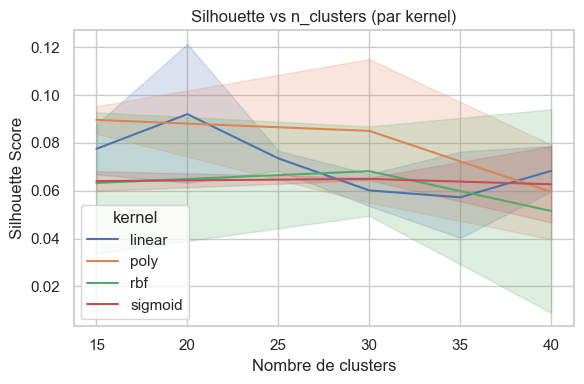

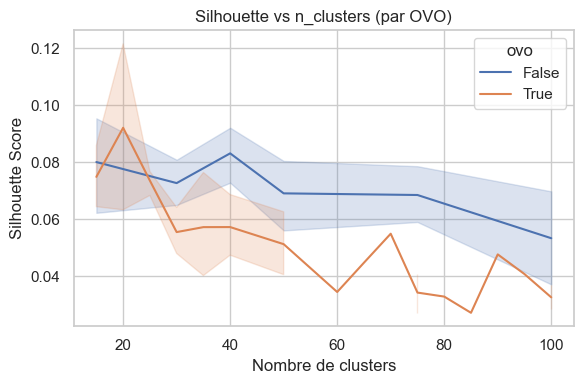

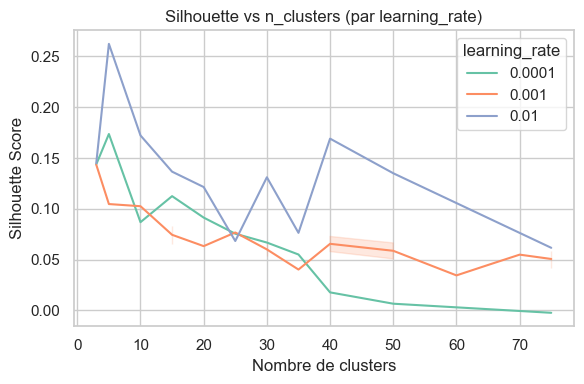

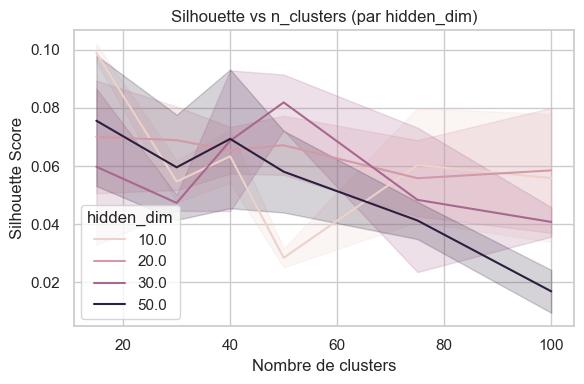

In [ ]:
sns.set_theme(style="whitegrid")

# -------- Courbe 1 : n_clusters vs silhouette selon kernel --------
plt.figure(figsize=(6, 4))
sns.lineplot(
    data=df[(df["n_clusters"] >= 15) & (df["n_clusters"] <= 40)],
    x="n_clusters",
    y="silhouette",
    hue="kernel"
)
plt.title("Silhouette vs n_clusters (par kernel)")
plt.xlabel("Nombre de clusters")
plt.ylabel("Silhouette Score")
plt.tight_layout()
plt.show()

# -------- Courbe 2 : n_clusters vs silhouette selon ovo --------
plt.figure(figsize=(6, 4))
sns.lineplot(data=df[df["n_clusters"] >= 15], x="n_clusters", y="silhouette", hue="ovo")
plt.title("Silhouette vs n_clusters (par OVO)")
plt.xlabel("Nombre de clusters")
plt.ylabel("Silhouette Score")
plt.tight_layout()
plt.show()

# -------- Courbe 3 : n_clusters vs silhouette selon learning_rate --------
plt.figure(figsize=(6, 4))
sns.lineplot(data=df[df["n_clusters"] <= 75], x="n_clusters", y="silhouette", hue="learning_rate", palette="Set2")
plt.title("Silhouette vs n_clusters (par learning_rate)")
plt.xlabel("Nombre de clusters")
plt.ylabel("Silhouette Score")
plt.xscale("linear")  # ou log si besoin
plt.tight_layout()
plt.show()

# -------- Courbe 4 : n_clusters vs silhouette selon hidden_dim --------
if "hidden_dim" in df.columns:
    plt.figure(figsize=(6, 4))
    sns.lineplot(data=df, x="n_clusters", y="silhouette", hue="hidden_dim")
    plt.title("Silhouette vs n_clusters (par hidden_dim)")
    plt.xlabel("Nombre de clusters")
    plt.ylabel("Silhouette Score")
    plt.tight_layout()
    plt.show()
else:
    print("❌ Colonne 'hidden_dim' non trouvée dans le DataFrame.")


### (Bis) Parcours d'un dossier pour agréger les résultats
Reprise de l'agrégation des fichiers de résultats pour une analyse groupée.

In [28]:

# 📁 Dossier contenant les résultats
folder_path = "./../results/json/st"  
folder_path_complet = "./../results/json/st/complet"
# 🔍 Trouve tous les fichiers .json et .jsonl
json_files = glob.glob(os.path.join(folder_path, "*.json"))
jsonl_files = glob.glob(os.path.join(folder_path, "*.jsonl"))
jsonl_files += glob.glob(os.path.join(folder_path_complet, "*.jsonl"))
# 📦 Liste de tous les résultats
results = []

# 📥 Lecture des fichiers .jsonl (une ligne = un dict)
for file_path in jsonl_files:
    print(f"📂 Chargement JSONL : {file_path}")
    with open(file_path, "r") as f:
        for line in f:
            try:
                results.append(json.loads(line))
            except json.JSONDecodeError as e:
                print(f"⚠️ Erreur JSONL dans {file_path} : {e}")

# 📥 Lecture des fichiers .json (fichier entier = list ou dict)
for file_path in json_files:
    print(f"📂 Chargement JSON : {file_path}")
    with open(file_path, "r") as f:
        try:
            data = json.load(f)
            # Si c’est une liste de dicts, on étend
            if isinstance(data, list):
                results.extend(data)
            else:
                results.append(data)
        except json.JSONDecodeError as e:
            print(f"⚠️ Erreur JSON dans {file_path} : {e}")

# ✅ Conversion en DataFrame
df = pd.DataFrame(results)
print(f"\n✅ {len(results)} résultats chargés depuis {len(json_files) } fichiers.")

# Aperçu des colonnes
print("📊 Colonnes disponibles :", df.columns.tolist())
# Filtrer les données pour n_clusters=30
data = [entry for entry in results if entry['n_clusters'] == 30 and entry['n_labels'] > 5]
print("Nombre de configurations pour n_clusters=30 :", len(data))
# Extraire le silhouette maximum pour n_clusters=30
silhouette_max = max(data, key=lambda x: x['silhouette'])
print("Silhouette maximum :", silhouette_max['silhouette'])
print("Configuration avec silhouette maximum :", silhouette_max)



📂 Chargement JSONL : ./../results/json/st\ovo_hid.jsonl
📂 Chargement JSONL : ./../results/json/st\rapport.jsonl
📂 Chargement JSONL : ./../results/json/st/complet\linear_20_-3.jsonl
📂 Chargement JSONL : ./../results/json/st/complet\poly_20_-3.jsonl
📂 Chargement JSON : ./../results/json/st\diff_kernel_re_standardise.json
📂 Chargement JSON : ./../results/json/st\finale_re_standardise.json

✅ 163 résultats chargés depuis 2 fichiers.
📊 Colonnes disponibles : ['kernel', 'n_clusters', 'learning_rate', 'n_labels', 'time', 'silhouette', 'calinski_harabasz', 'davies_bouldin', 'score', 'n_iter', 'ovo', 'hidden_dim', 'sample_size', 'ov']
Nombre de configurations pour n_clusters=30 : 28
Silhouette maximum : 0.1151
Configuration avec silhouette maximum : {'kernel': 'poly', 'n_clusters': 30, 'learning_rate': 0.001, 'n_labels': 13, 'time': 131.93, 'silhouette': 0.1151, 'calinski_harabasz': 102.9375, 'davies_bouldin': 2.8418, 'score': 2.0925, 'n_iter': 1000, 'ovo': True}
